การวิเคราะห์ปัจจัยที่ส่งผลต่อการเป็นโรคหัวใจ

id (Unique id for each patient)

age (Age of the patient in years)

origin (place of study)

sex (Male/Female)

cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])

trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))

chol (serum cholesterol in mg/dl)

fbs (if fasting blood sugar > 120 mg/dl)
restecg (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy]

thalach: maximum heart rate achieved

exang: exercise-induced angina (True/ False)

oldpeak: ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment

ca: number of major vessels (0-3) colored by fluoroscopy

thal: [normal; fixed defect; reversible defect]

num: the predicted attribute


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
data = pd.read_csv("dataset//heart_disease_uci.csv")


In [13]:
data["target"] = data["num"].apply(lambda x: 1 if x > 0 else 0)
data = data.drop(columns=["num", "id"], errors='ignore') #ID ออกเพราะข้อมูลไม่เกี่ยวข้อง
X = data.drop(columns=["target"])
y = data["target"]



In [14]:
#เเยกข้อมูลเพื่อเตรียมไปวิเคราะห์
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
#ใช้ Pipeline เพื่อจัดการทำงานให้เป็นระบบเเละง่ายต่อการจัดเรียง
numeric_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())])

categorical_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))])

preprocessor = ColumnTransformer([("num", numeric_pipe, num_cols),("cat", categorical_pipe, cat_cols)])

pipeline = Pipeline([("preprocess", preprocessor),
    ("clf", RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42))])


In [ ]:
#เเยกข้อมูลออกมาเทรนนิ่งเเละเทส
x_tr, x_t, y_tr, y_t = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

pipeline.fit(x_tr, y_tr)

pred = pipeline.predict(x_t)
print("Accuracy:", accuracy_score(y_t, pred))
print(classification_report(y_t, pred))
print(pipeline.score(x_t,y_t))

Accuracy: 0.8641304347826086
              precision    recall  f1-score   support

           0       0.88      0.80      0.84        82
           1       0.85      0.91      0.88       102

    accuracy                           0.86       184
   macro avg       0.87      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184

0.8641304347826086


ค่าดังกล่าวบอกได้ว่า 

Accuracy  -> การทำนายความเเม่นยำของโมเดลนี้ที่ทำนายว่าจะเป็นโรคหัวใจอยู่ที่ 86%
Precision -> การทำนายความเเม่นยำเฉพาะกลุ่มคนที่เป็นโรคหัวใจ อยู่ที่ 85%
recall -> การทำนายความเเม่นยำว่าคนเป็นโรคทั้งหมดจริงๆ 91% (ตรวจจับเจอโรคจริงๆ)
F1-score -> ค่ากลาง Precision เเละ recall 
Support -> จำนวนข้อมูลที่เป็นโรค ไม่เป็นโรค

In [22]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(pred,y_t)

array([[66,  9],
       [16, 93]])

In [9]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline, X, y, cv=5)
print("Cross-validation Accuracy:", scores.mean())


Cross-validation Accuracy: 0.7630434782608695


<Axes: >

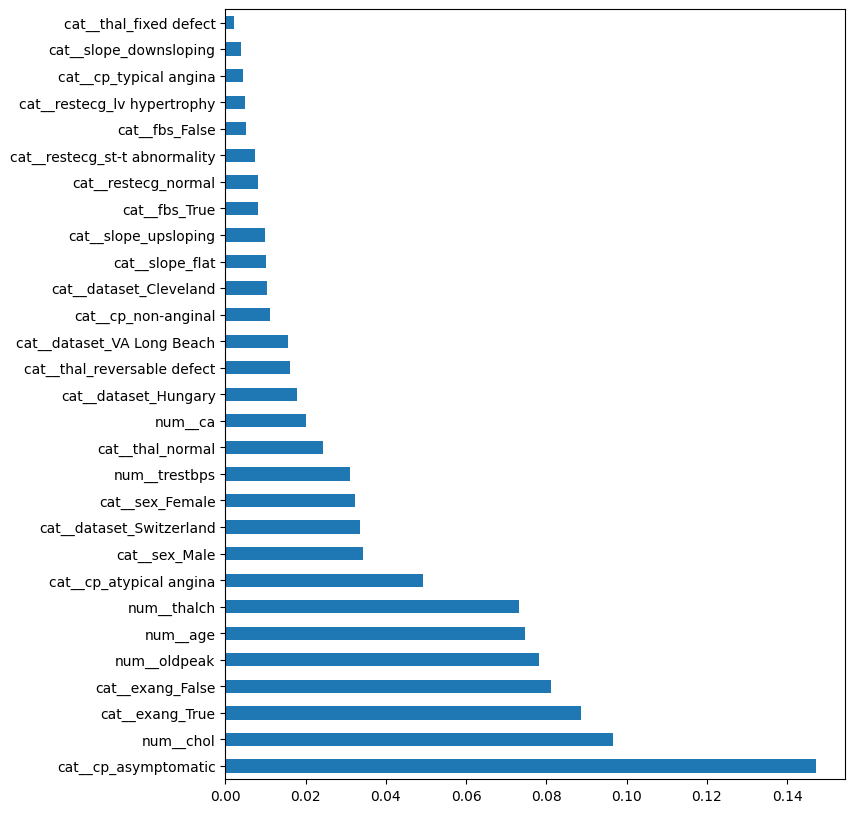

In [ ]:
#ดูความสำคัญของเเต่ละ Feature ว่ามีความสำคัญต่อการเป็นโรคหัวใจ
model = pipeline.named_steps["clf"]
feature_names = pipeline.named_steps["preprocess"].get_feature_names_out()
importance = pd.Series(model.feature_importances_, index=feature_names)
importance.sort_values(ascending=False).plot.barh(figsize=(8,10))


In [29]:
pipeline = Pipeline([("preprocess", preprocessor),
    ("clf", RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42))])
pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalch', 'oldpeak', 'ca']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'dataset', 'cp',
                                                   'fbs', 'restecg', 'exang',
                                                   'slope', 'thal'])])),
                ('clf', RandomForestClassifier(max_depth=6, random_state=42))])

In [30]:
from sklearn.feature_selection import RFE

In [ ]:
# ดูความลึกค่า Max_dept ในการเเตกกิ่งก้านเงื่อนไขข้อมูล
for maxdept in [3,5,7,9]:  
    pipeline = Pipeline([("preprocess", preprocessor),
    ("clf", RandomForestClassifier(n_estimators=100, max_depth=maxdept, random_state=42))])
    pipeline.fit(x_tr,y_tr)
    print(pipeline.score(x_t,y_t))

0.8478260869565217
0.8532608695652174
0.8532608695652174
0.8532608695652174


In [ ]:
# หา Feature สำคัญๆ ที่ส่งผลต่อโมเดลที่ดีที่สุด
for i in [3,4,5,6,7]:
    pipeline = Pipeline([("preprocess", preprocessor),
    ("clf", RFE(RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),n_features_to_select=i,step=1))])
    pipeline.fit(x_tr,y_tr)
    print(pipeline.score(x_t,y_t))

0.782608695652174
0.8206521739130435
0.8206521739130435
0.8315217391304348
0.8152173913043478


In [ ]:
x_tr_transformed = preprocessor.fit_transform(x_tr)
rfe = RFE(RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42), n_features_to_select=5)
rfe.fit(x_tr_transformed, y_tr)
support = rfe.support_
ohe_features = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols)
numeric_features = num_cols
all_features = np.concatenate([numeric_features, ohe_features])
selected_features = all_features[support]
print("Selected Features:")
print(selected_features)


Selected Features:
['chol' 'thalch' 'oldpeak' 'cp_asymptomatic' 'exang_True']


 สรุป พารามิเตอร์ที่ส่งผลทำให้โมเดลทำนายว่าจะเป็นโรคหัวใจ คือ

['chol' 'thalch' 'oldpeak' 'cp_asymptomatic' 'exang_True']

ซึ่งมีการทำนายได้ถูกต้องอยู่ที่ 86%

การทำนายเฉพาะกลุ่มคนที่เป็นโรคหัวใจอยู่ที่ 85%

การทำนายความเเม่นยำว่าคนเป็นโรคทั้งหมดจริงๆ 91% (ตรวจจับเจอโรคจริงๆ)

